In [9]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
C:\Users\karth\AppData\Local\Temp\ipykernel_10404\2078863056.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][50:] = np.where(df['MA20'][50:] > df['MA50'][50:], 1, -1)


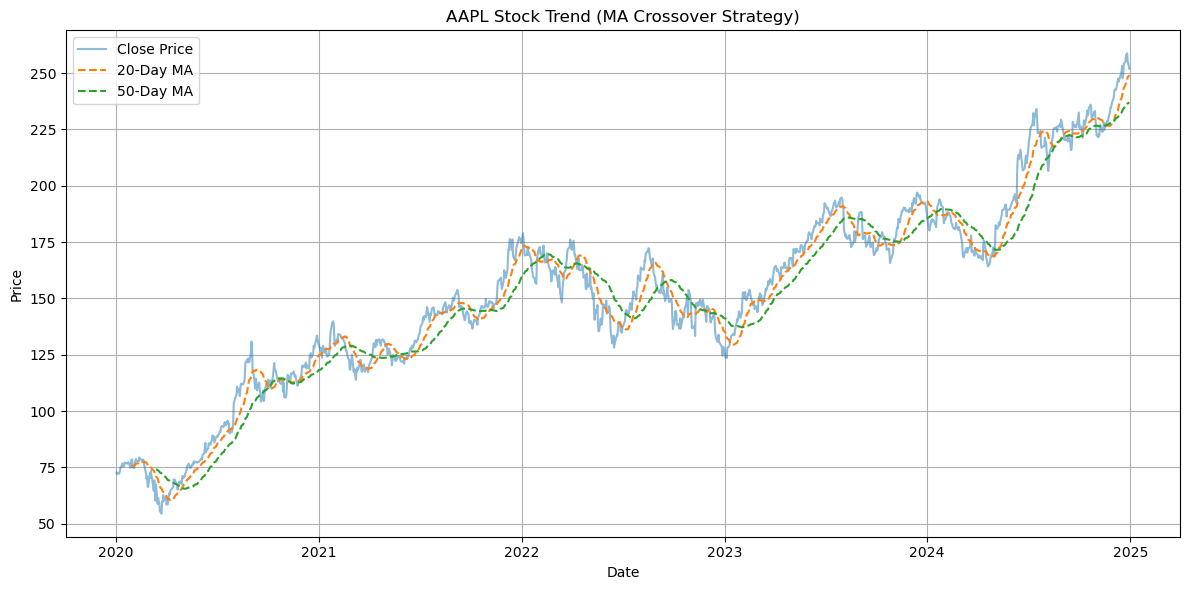

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1-10: Download stock data
symbol = 'AAPL'
start = '2020-01-01'
end = '2024-12-31'
data = yf.download(symbol, start=start, end=end)
df = data[['Close']].copy()

# 11-20: Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# 21-30: Generate simple signal
df['Signal'] = 0
df['Signal'][50:] = np.where(df['MA20'][50:] > df['MA50'][50:], 1, -1)
df['Prediction'] = df['Signal'].shift(1)

# 31-40: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['MA20'], label='20-Day MA', linestyle='--')
plt.plot(df['MA50'], label='50-Day MA', linestyle='--')
plt.title(f"{symbol} Stock Trend (MA Crossover Strategy)")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# 41-45: Show the plot
plt.tight_layout()
plt.show()
